In [116]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import variation
from importlib import reload

In [5]:
# Get selling price information
df = pd.read_csv("../../../res/car-data.csv")
selling_price = df["Selling_Price"]
selling_price.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [11]:
# Measure of central tendency (mean median mode midrange)
print("mean: " + str(selling_price.mean()))
print("median: " + str(selling_price.median()))
print("mode: " + str(selling_price.mode()))

mean: 4.661295681063123
median: 3.6
mode: 0    0.45
1    0.60
dtype: float64


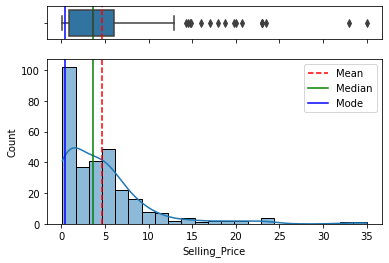

mean: 4.661295681063123
median: 3.6
mode: 0.45
min: 0.1
max: 35.0


In [44]:
# Visualise mean median mode
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=selling_price.mean()
median=selling_price.median()
mode=selling_price.mode().values[0]

sns.boxplot(data=df, x="Selling_Price", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Selling_Price", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

print("mean: " + str(mean))
print("median: " + str(median))
print("mode: " + str(mode))
print("min: " + str(selling_price.min()))
print("max: " + str(selling_price.max()))

q1: 0.9
q2: 3.6
q3: 6.0
q4: 35.0
Interquartile Range: 5.1


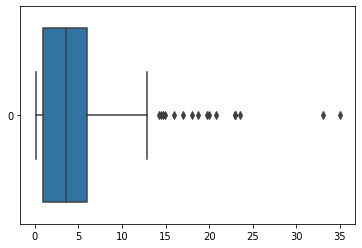

outliers counts: 50
total count: 301
Ratio of outlters: 0.16611295681063123


In [59]:
# Measures of Relative Location (percentile decile quartile interquartile range)
q1 = np.quantile(selling_price, .25)
q2 = np.quantile(selling_price, .50)
q3 = np.quantile(selling_price, .75)
q4 = np.quantile(selling_price, 1)
iqr = q3 - q1
upper_fence = iqr*1.5
outlier_count = df[df["Selling_Price"] > upper_fence].count()
outlier_count = outlier_count.Present_Price

print("q1: " + str(q1))
print("q2: " + str(q2))
print("q3: " + str(q3))
print("q4: " + str(q4))
print("Interquartile Range: " + str(iqr))

sns.boxplot(data=selling_price, orient="h")
plt.show()

print("outliers counts: " + str(outlier_count))
print("total count: " + str(len(selling_price)))
print("Ratio of outlters: " + str(outlier_count/len(selling_price)))


In [82]:
# Range variance standard deviation
variance = selling_price.var()
std = selling_price.std()

var = variation(selling_price, axis=0)
idmax = np.argmax(var)

print("variance: " + str(variance))
print("std: " + str(std))
print("coefficient of variation: " + str(var))

variance: 25.83497331561462
std: 5.082811556177803
coefficient of variation: 1.0886160566734437


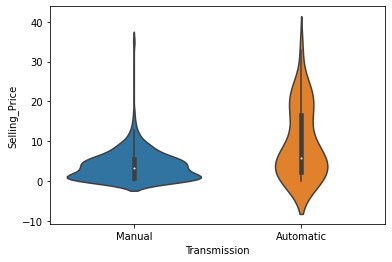

Mean of manual cars: 3.931992337164751
Mean of automatic cars: 9.42


In [93]:
# Distribution of Selling Price according to Transmission type of car being sold
manual = df[df["Transmission"] == "Manual"]["Selling_Price"].mean()
automatic = df[df["Transmission"] == "Automatic"]["Selling_Price"].mean()
sns.violinplot(x="Transmission", y="Selling_Price", data=df)
plt.show()
print("Mean of manual cars: " + str(manual))
print("Mean of automatic cars: " + str(automatic))

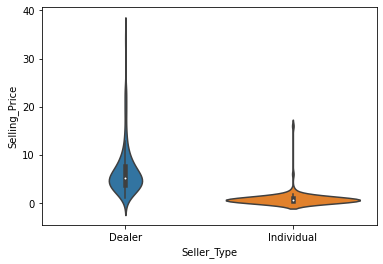

Mean of dealer cars: 6.721692307692308
Mean of individual cars: 0.870943396226415


In [95]:
dealer = df[df["Seller_Type"] == "Dealer"]["Selling_Price"].mean()
individual = df[df["Seller_Type"] == "Individual"]["Selling_Price"].mean()
sns.violinplot(x="Seller_Type", y="Selling_Price", data=df)
plt.show()
print("Mean of dealer cars: " + str(dealer))
print("Mean of individual cars: " + str(individual))

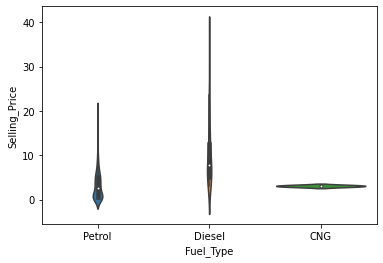

Mean of diesel cars: 10.278500000000001
Mean of petrol cars: 3.26418410041841
Mean of cng cars: 3.1


In [97]:
diesel = df[df["Fuel_Type"] == "Diesel"]["Selling_Price"].mean()
petrol = df[df["Fuel_Type"] == "Petrol"]["Selling_Price"].mean()
cng = df[df["Fuel_Type"] == "CNG"]["Selling_Price"].mean()
sns.violinplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.show()
print("Mean of diesel cars: " + str(diesel))
print("Mean of petrol cars: " + str(petrol))
print("Mean of cng cars: " + str(cng))

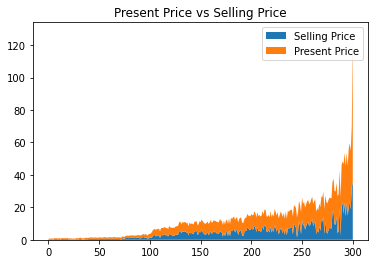

Mean price drop percentage: 36.55483605496335


In [131]:
differences = ( df["Present_Price"] - df["Selling_Price"] ) / df["Present_Price"] * 100
mean_diff_percentages = differences.mean()

df_sorted = df.sort_values("Present_Price")
x = range(0,len(df))
labels = ["Selling Price", "Present Price"]
plt = reload(plt)
plt.stackplot(x, df_sorted["Selling_Price"], df_sorted["Present_Price"], labels=labels)
plt.legend()
plt.title("Present Price vs Selling Price")
plt.show()

print("Mean price drop percentage: " + str(mean_diff_percentages))

# differences

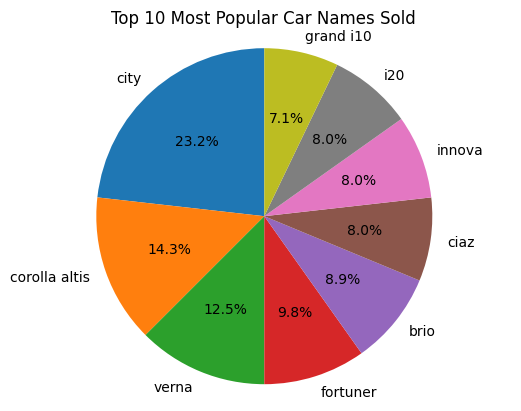

In [165]:
specs = df["Car_Name"].value_counts().keys()[0:10]
c_specs = df["Car_Name"].value_counts().values[0:10]
plt.pie(c_specs, labels=specs, startangle=90, autopct='%1.1f%%')
plt.title('Top 10 Most Popular Car Names Sold')
plt.axis('equal')
plt.show()

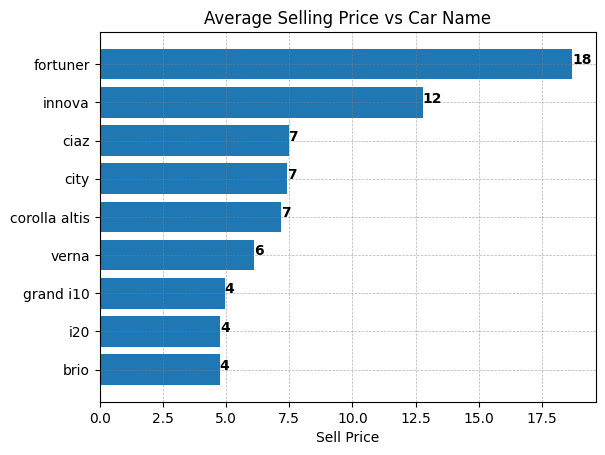

In [162]:
top_carnames_df = df.groupby('Car_Name').filter(lambda x : len(x)>7)
avg_sell_price = top_carnames_df.groupby("Car_Name")["Selling_Price"].mean()
k = avg_sell_price.keys()
v = avg_sell_price.values
v, k = (list(t) for t in zip(*sorted(zip(v, k))))

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(k, v)
# Add x, y gridlines
ax.grid(visible = True, color ='grey',linestyle ='--', linewidth =0.5, alpha = 0.6)
# Set labels
ax.set_xlabel('Sell Price')
ax.set_title('Average Selling Price vs Car Name')
# Show Values
for i in ax.patches:
    plt.text(i.get_width()-0,i.get_y()+0.4,
    str(int(i.get_width())), fontsize = 10, fontweight='bold',color ='black')
plt.show()


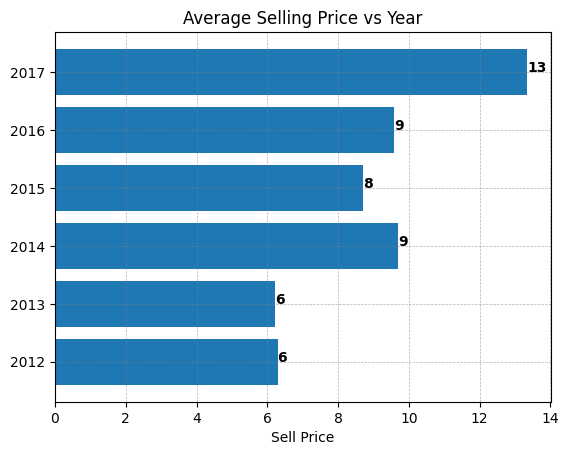

In [161]:
top_carnames_df = df.groupby('Year').filter(lambda x : len(x)>7)
avg_sell_price = top_carnames_df.groupby("Year")["Selling_Price"].mean()
k = avg_sell_price.keys()
v = avg_sell_price.values
k, v = (list(t) for t in zip(*sorted(zip(k, v))))

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(k, v)
# Add x, y gridlines
ax.grid(visible = True, color ='grey',linestyle ='--', linewidth =0.5, alpha = 0.6)
# Set labels
ax.set_xlabel('Sell Price')
ax.set_title('Average Selling Price vs Year')
# Show Values
for i in ax.patches:
    plt.text(i.get_width()-0,i.get_y()+0.4,
    str(int(i.get_width())), fontsize = 10, fontweight='bold',color ='black')
plt.show()
